## 손실 함수

### 오차제곱합

In [10]:
# 소수점 표현이 교재와 달라 format 함수로 자릿수를 맞춰줌
import numpy as np

def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# print(sum_squares_error(np.array(y), np.array(t)))
print(format(sum_squares_error(np.array(y), np.array(t)), '.18f'))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# print(sum_squares_error(np.array(y), np.array(t)))
print(format(sum_squares_error(np.array(y), np.array(t)), '.17f'))


0.097500000000000031
0.59750000000000003


### 교차손실함수

In [42]:
# np.log()에 0을 입력하게 되어 오류가 발생

def cross_entropy_error(y, t):
    return -np.sum(t * np.log(y))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

/var/folders/hn/nrs0d2b91f1f7jdk9wdd8yfc0000gn/T/ipykernel_3926/1968273501.py:4: RuntimeWarning: divide by zero encountered in log
  return -np.sum(t * np.log(y))
/var/folders/hn/nrs0d2b91f1f7jdk9wdd8yfc0000gn/T/ipykernel_3926/1968273501.py:4: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(t * np.log(y))


nan

In [43]:
# 위 에러를 방지하기 위해 아주 작은 값, delta를 추가
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

### 미니배치 학습

In [60]:
import numpy as np
from mnist import load_mnist

# one_hot_label=False로 설정하면 t_train, t_test의 값이 변함
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000,)


In [52]:
np.random.choice(60000, 10)

array([38624, 23946,  3365,  5518, 43332, 30918, 43674, 19923, 11125,
       33168])

In [49]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

### 배치용 교차 엔트로피 오차 구현하기

In [53]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    # t가 one-hot이므로 0과 곱해지는 부분은 무시가 됨
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [54]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    # t로 나타낸 인덱스를 y에서 추출해야 함 
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## 수치 미분

- h의 값이 너무 작아 값이 제대로 표현되지 않고 0으로 바뀜
- 수치 미분에는 오차가 포함됨: 진정한 미분값을 컴퓨터에서 구할 수는 없음

In [69]:
def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h)-f(x)) / h

In [71]:
import numpy as np

print(np.float32(1e-50))
print(np.float32(1e-4))

0.0
1e-04


중심/중앙 차분

In [72]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [73]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

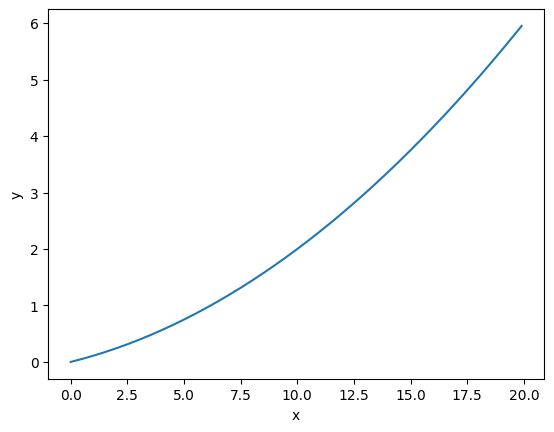

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# 교재와 눈금이 다르게 표시됨. 교재에서는 x축의 값이 [0, 5, 10, 15, 20]임
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.show()

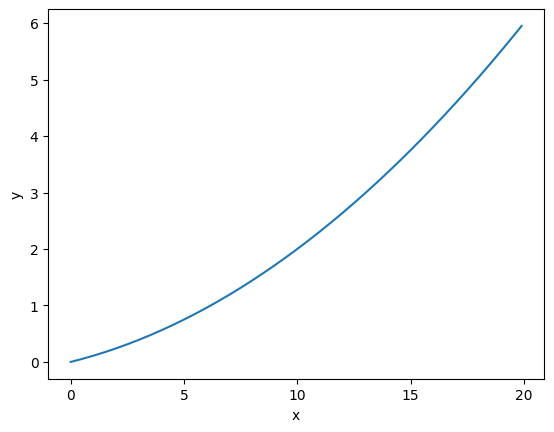

In [77]:
plt.xlabel('x')
plt.ylabel('y')
# x축 눈금 범위를 변경하여 축을 교재와 동일하게 표현
plt.xticks(np.arange(0,25,5,dtype=np.int_))

plt.plot(x, y)
plt.show()

In [79]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


편미분

In [80]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [81]:
# 여기서 상수를 바꾸더라도 미분에는 영향을 주지 않음. 변수 x1이 아니기 때문.
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [86]:
# 여기서 상수를 바꾸더라도 미분에는 영향을 주지 않음. 변수 x1이 아니기 때문.
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

### 기울기